In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot") #shows this style of graphs


In [2]:
df=pd.read_csv("../Pandas Dataset/coaster_db.csv")
df.shape

(1087, 56)

In [3]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Data Preperation

### 2 major ways to remove column

In [5]:
# df.drop([column_names in list],axis=1) list of columns to be removed

In [6]:
#column remove using subset method. we can get the list of columns by typing df.columns. from there we copy paste them, and comment out 
#unnecessary columns and save them in the new datdframe variable. then work with it

df=df[['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer',
       #'Height restriction', 'Model',
       # 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
       'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
       #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
       'height_value', 
       # 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [7]:
df.dtypes

coaster_name           object
Length                 object
Speed                  object
Location               object
Status                 object
Opening date           object
Type                   object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_value          float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [8]:
pd.to_datetime(df["opening_date_clean"]) #convert dtype of datetime from object to datatime object

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [9]:
df.isna().sum() # sum of null values in every column    

coaster_name            0
Length                134
Speed                 150
Location                0
Status                213
Opening date          250
Type                    0
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_value          122
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [10]:
df.loc[df.duplicated(subset="coaster_name")].head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,NaN,0,4.0
60,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,77.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,NaN,Steel – Mine Train,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,104.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel – Powered – Mine Train,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,10.0,32.8,0,NaN


In [11]:
df.query("coaster_name=='Crystal Beach Cyclone'") # experimenting some samples, how they are duplicated. we used first value from duplicaed()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,NaN,0,4.0
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,NaN,0,4.0


In [12]:
df.duplicated(subset=["coaster_name","Opening date"]).sum()

97

In [13]:
df=df.loc[~df.duplicated(subset=["coaster_name","Opening date"])].reset_index(drop=True) # ~ sign means not duplicated. we include them in our dataframe
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,50.0,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,1,NaN


# Data Feature Understanding

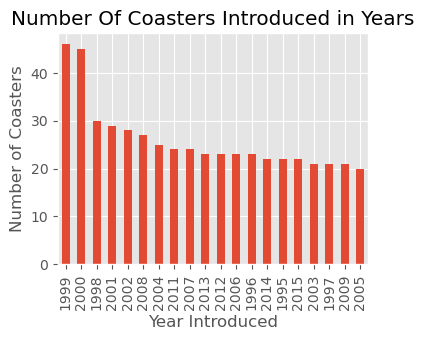

In [14]:
#plotting using matplotlib with pandas
year_counts = df["year_introduced"].value_counts().head(20)
plt.figure(figsize=(4,3))
year_counts.plot(kind='bar')
plt.title("Number Of Coasters Introduced in Years")
plt.xlabel("Year Introduced")
plt.ylabel("Number of Coasters")
plt.show()

In [15]:
df.query("coaster_name=='Crystal Beach Cyclone'") # experimenting some samples, how they are duplicated. we used first value from duplicaed()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,NaN,0,4.0


<Axes: title={'center': 'Number Of Coasters Introduced in Years'}, xlabel='year_introduced'>

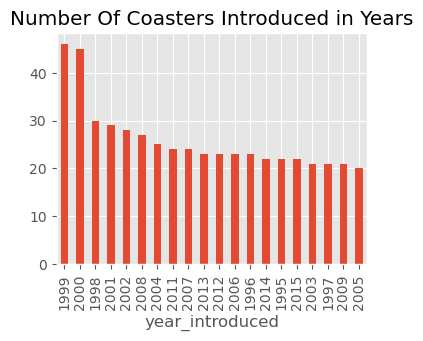

In [16]:
#plotting using pandas in one line
plt.figure(figsize=(4,3))
df["year_introduced"].value_counts().head(20).plot(kind='bar',title="Number Of Coasters Introduced in Years")

<Axes: >

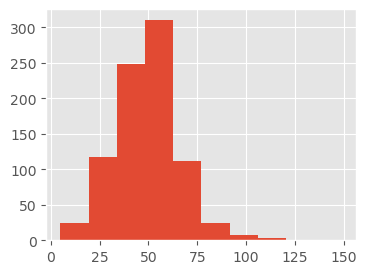

In [17]:
plt.figure(figsize=(4,3))
df["speed_mph"].hist(bins=10,)

<Axes: ylabel='Density'>

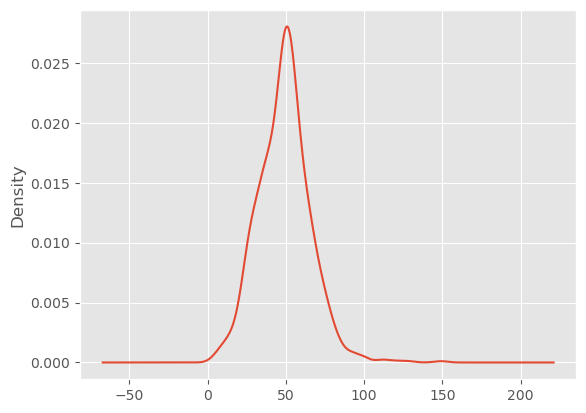

In [18]:
df["speed_mph"].plot(kind="kde")

# Feature Relationships (how they are related to each other)

<Axes: xlabel='speed_mph', ylabel='height_value'>

<Figure size 400x300 with 0 Axes>

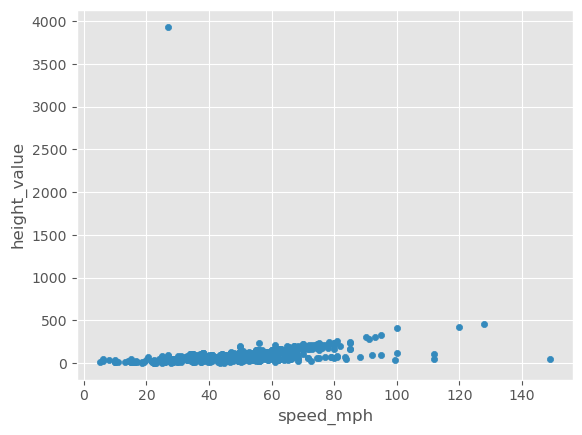

In [19]:
plt.figure(figsize=(4,3))
df.plot(kind="scatter",x="speed_mph",y="height_value")

### same result but we convert the values in inches and et better outcome

<Axes: xlabel='speed_mph', ylabel='height_ft'>

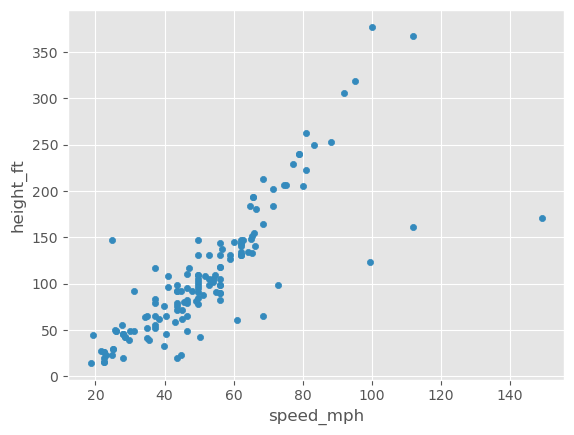

In [20]:
df.plot(kind="scatter",x="speed_mph",y="height_ft")

c:\Users\isfar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isfar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isfar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isfar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

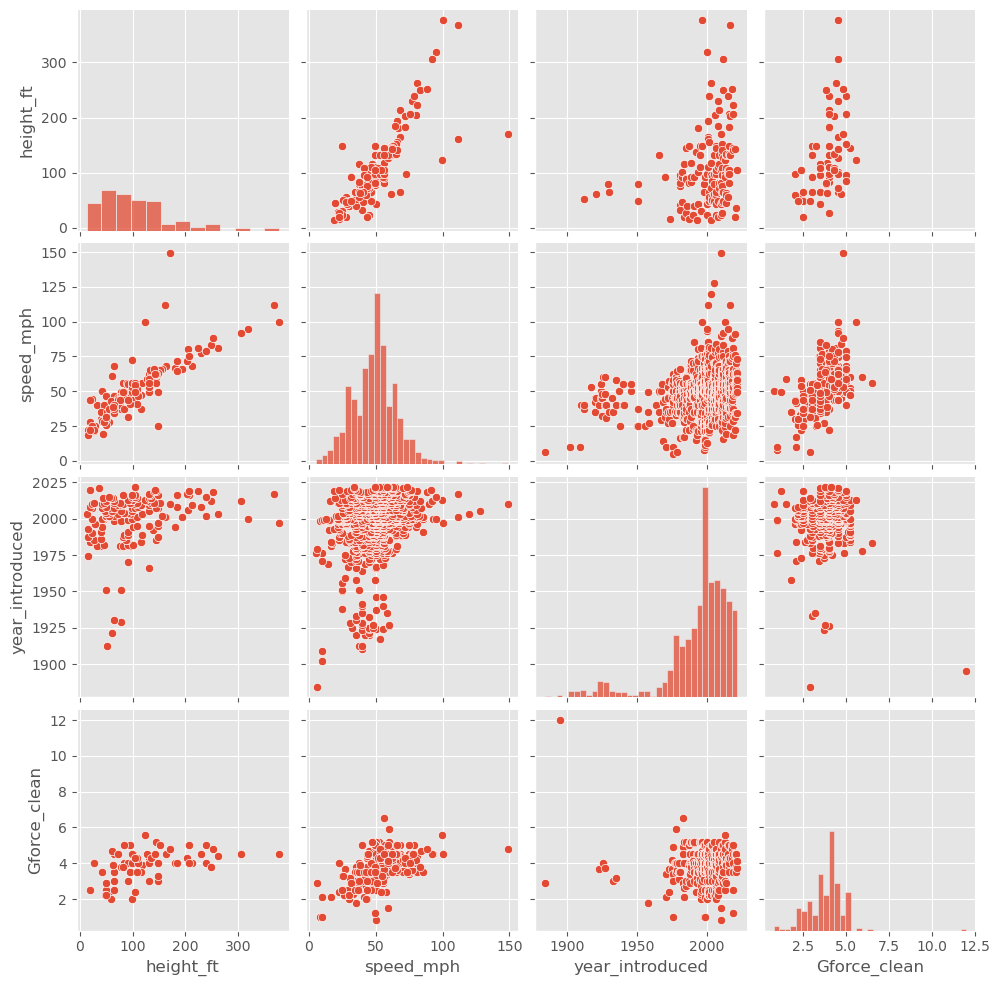

In [21]:
sns.pairplot(df,vars=["height_ft","speed_mph","year_introduced","Gforce_clean"])
plt.show()

# Understanding Correlation betweeen columns

In [22]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,50.0,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,1,NaN


In [23]:
corr=df[["height_ft","speed_mph","year_introduced","Gforce_clean"]].dropna().corr() #gives us the correlation matrix and drops na values
corr

,height_ft,speed_mph,year_introduced,Gforce_clean
height_ft,1.000000,0.733999,0.135413,0.466482
speed_mph,0.733999,1.000000,0.171978,0.607383
year_introduced,0.135413,0.171978,1.000000,0.160247
Gforce_clean,0.466482,0.607383,0.160247,1.000000


### visualising correlation

<Axes: >

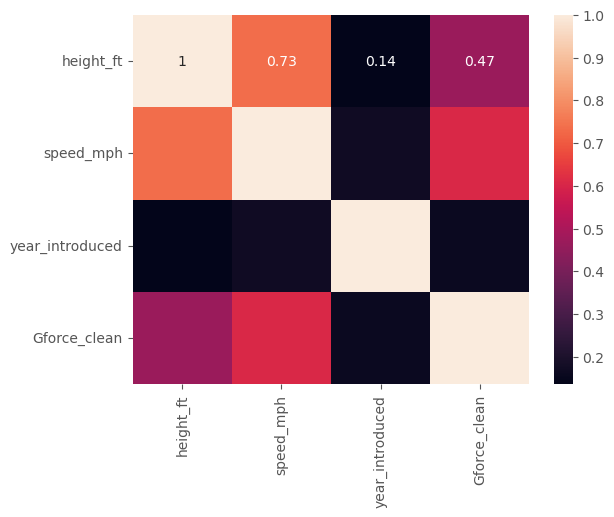

In [24]:
sns.heatmap(corr,annot=True)